In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading dataset


In [2]:
data = pd.read_csv(r"C:\Users\jbnay\Downloads\diabetes (1).csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape


(768, 9)

# Preprocessing

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Missing value
#Missing value handling



In [7]:
x= data.drop(['Outcome'],axis=1)


In [8]:
y=data['Outcome']

In [9]:
x=x.replace(0,np.nan)

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
num_cols =['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [12]:
from sklearn.impute import SimpleImputer

imputer  = SimpleImputer(missing_values = np.nan,strategy ='median')
x[num_cols] = imputer.fit_transform(x[num_cols])

In [13]:
x.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [14]:
# Outlier checking
# Outlier handling for unusual attribute

In [15]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.423177,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885
std,2.980481,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<Axes: >

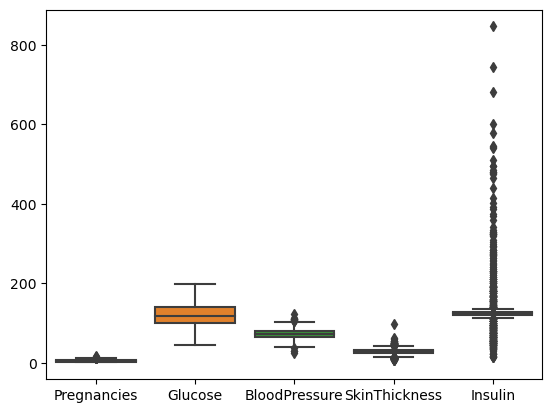

In [16]:

sns.boxplot(x[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin']])


In [17]:
#insulin

q1 = data['Insulin'].quantile(.25)
q2 = data['Insulin'].quantile(.50)
q3 = data['Insulin'].quantile(.75)

iqr = q3-q1
print(iqr)

127.25


In [18]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)
print(up_lim,low_lim)

318.125 -190.875


In [19]:
def limit_imputer(value):
    if value > up_lim:
        return up_lim
    if value < low_lim:
        return low_lim
    else:
        return value

In [20]:
data['Insulin'] =data['Insulin'].apply(limit_imputer)

# Visualization

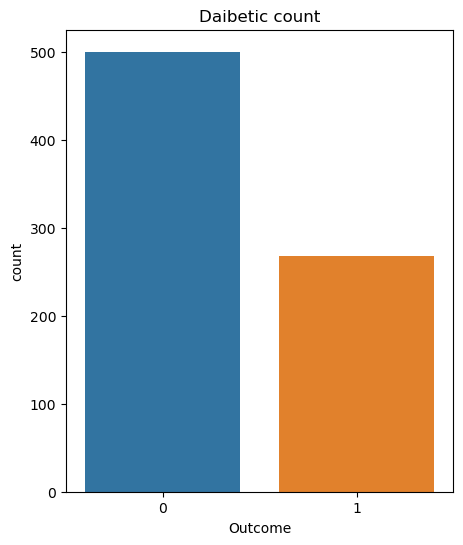

In [21]:
# Count of diabetic and non-diabetic
plt.figure(figsize= (5,6))
sns.countplot(x=data['Outcome'])
plt.title('Daibetic count')
plt.show()

<Axes: title={'center': 'Pregnancy-Diabetic relation'}, xlabel='Outcome', ylabel='Pregnancies'>

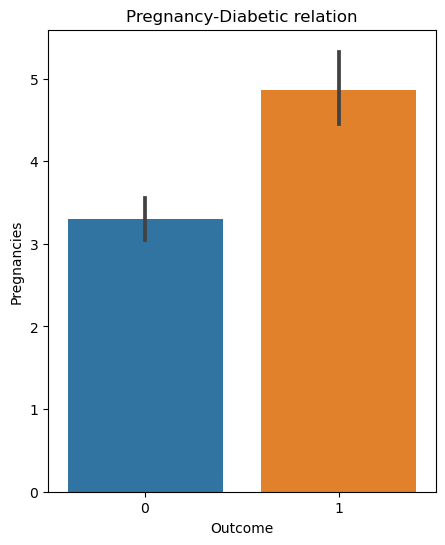

In [22]:
plt.figure(figsize= (5,6))
plt.title ("Pregnancy-Diabetic relation")
sns.barplot(x='Outcome',y='Pregnancies',data=data)

<Axes: title={'center': 'Age v/s Outcome'}, xlabel='Outcome', ylabel='Age'>

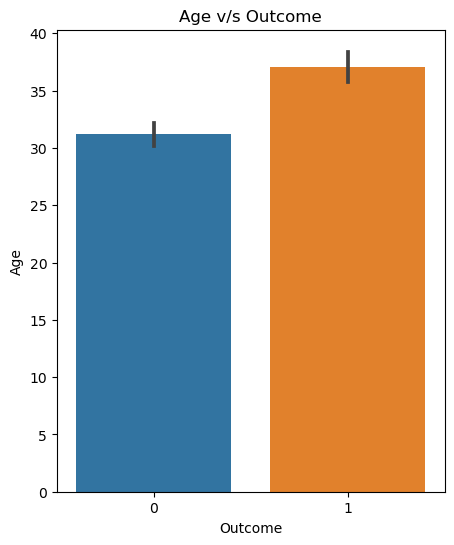

In [23]:
plt.figure(figsize= (5,6))
plt.title ("Age v/s Outcome")
sns.barplot(x='Outcome',y='Age',data=data)

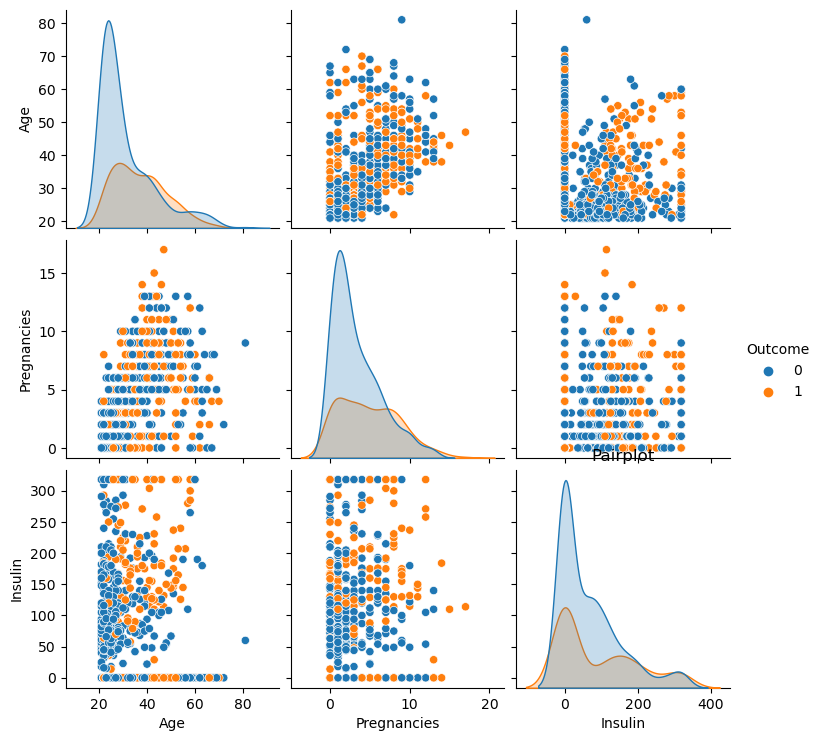

In [24]:
sns.pairplot(data,hue='Outcome',vars =['Age','Pregnancies','Insulin'])
plt.title('Pairplot')
plt.show()

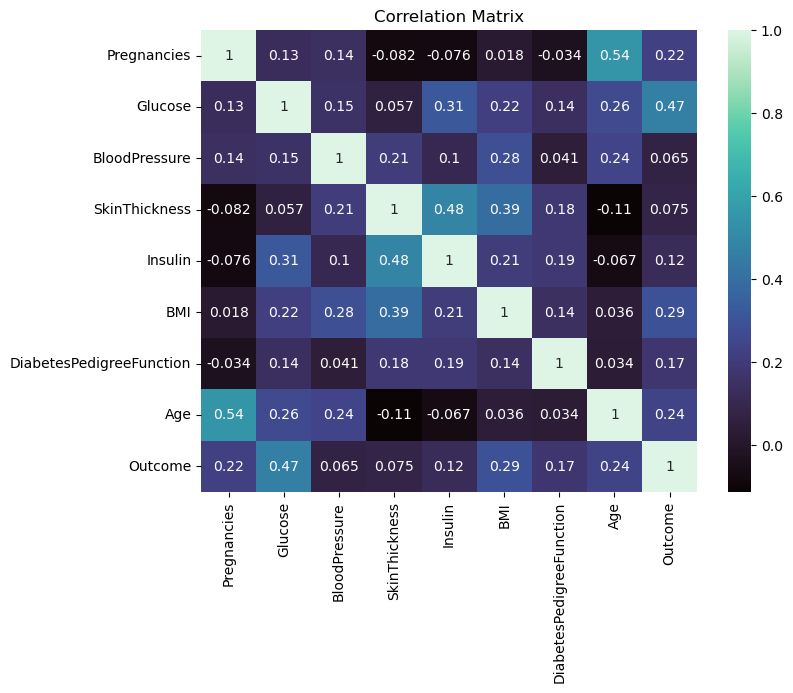

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot = True, cmap='mako')
plt.title('Correlation Matrix')
plt.show()

In [26]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [27]:
x.shape

(768, 8)

In [28]:
from sklearn.model_selection import train_test_split

Splitting data

In [29]:
# train_test_split

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=.25,random_state=42)

# Modeling

Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [31]:
#training
logit.fit(x_train,y_train)

LogisticRegression()

In [32]:
pred1=logit.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
accuracy = accuracy_score(y_test, pred1)
confusion = confusion_matrix(y_test, pred1)
classification_report = classification_report(y_test, pred1)

print("Accuracy:", accuracy)
print("Confusion matrix:",confusion )
print("Classification report:", classification_report)

Accuracy: 0.7395833333333334
Confusion matrix: [[100  23]
 [ 27  42]]
Classification report:               precision    recall  f1-score   support

           0       0.79      0.81      0.80       123
           1       0.65      0.61      0.63        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192



 kNN Classification

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
metric_k =[]
n = np.arange(3,15)


for k in n:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
    classifier.fit(x_train,y_train)
    pred2  = classifier.predict(x_test)
    acc = accuracy_score(y_test,pred2)
    metric_k.append(acc)

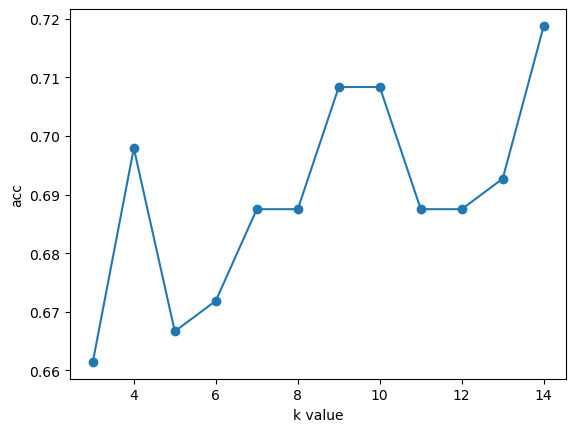

In [37]:
plt.plot(n,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('acc')
plt.show()

In [38]:
classifier = KNeighborsClassifier(n_neighbors = 14 ,metric = 'euclidean')
classifier.fit(x_train,y_train)
pred2  = classifier.predict(x_test)

In [39]:
accuracy = accuracy_score(y_test, pred2)
print("Accuracy:", accuracy)

Accuracy: 0.71875


In [40]:
confusion = confusion_matrix(y_test, pred2)
print("Confusion matrix:",confusion )

Confusion matrix: [[103  20]
 [ 34  35]]


SVM classification

In [41]:
from sklearn.svm import SVC

In [42]:
sv = SVC(kernel = 'poly',degree =3)

In [43]:
sv.fit(x_train,y_train)

SVC(kernel='poly')

In [44]:
pred3 = sv.predict(x_test)

In [45]:
accuracy = accuracy_score(y_test, pred3)
print("Accuracy:", accuracy)

Accuracy: 0.734375


In [46]:
confusion = confusion_matrix(y_test, pred3)
print("Confusion matrix:",confusion )

Confusion matrix: [[103  20]
 [ 31  38]]


Among the classification models Logistic regression offers slightly better accuracy.

In [47]:
new_outcome= np.array([[6,148,72,35,125,33.6,0.62,50]])

In [48]:
check_pred =logit.predict(new_outcome)

if check_pred[0]==0:
 print('Person have no diabetes')
else:  
 print('Diabetic person') 

Diabetic person
